<a href="https://colab.research.google.com/github/a01452054/Econometria/blob/main/Pregunta_18_Examen_Econometria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload the Excel file 'Table 21.1 Gujarati.xlsx'


Saving Table 21.1 Gujarati.xlsx to Table 21.1 Gujarati (2).xlsx


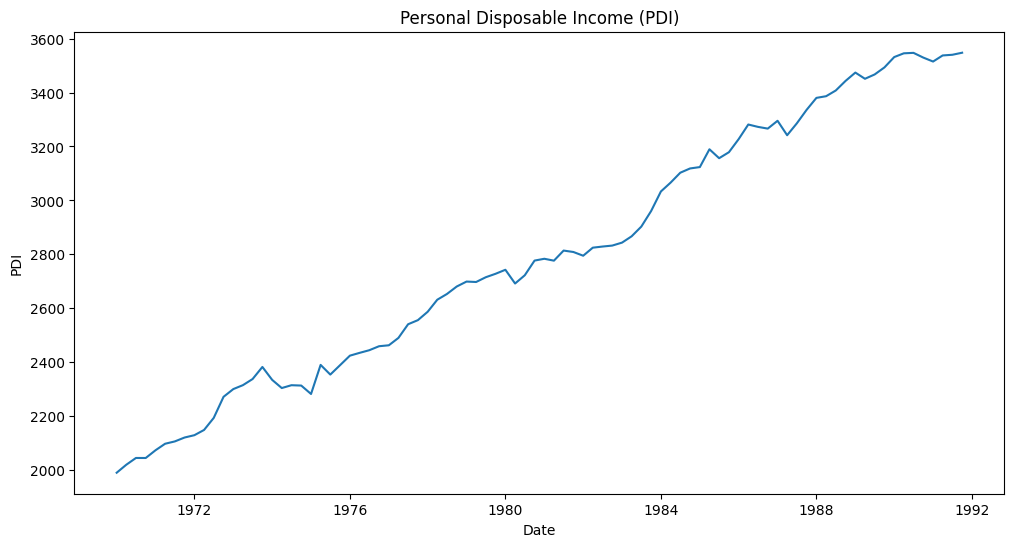

Stationarity test for original series:
ADF Statistic: -0.6715760764960405
p-value: 0.8539752558788607
Series is not stationary

Stationarity test for differenced series:
ADF Statistic: -9.63616722393705
p-value: 1.5644918112126032e-16
Series is stationary


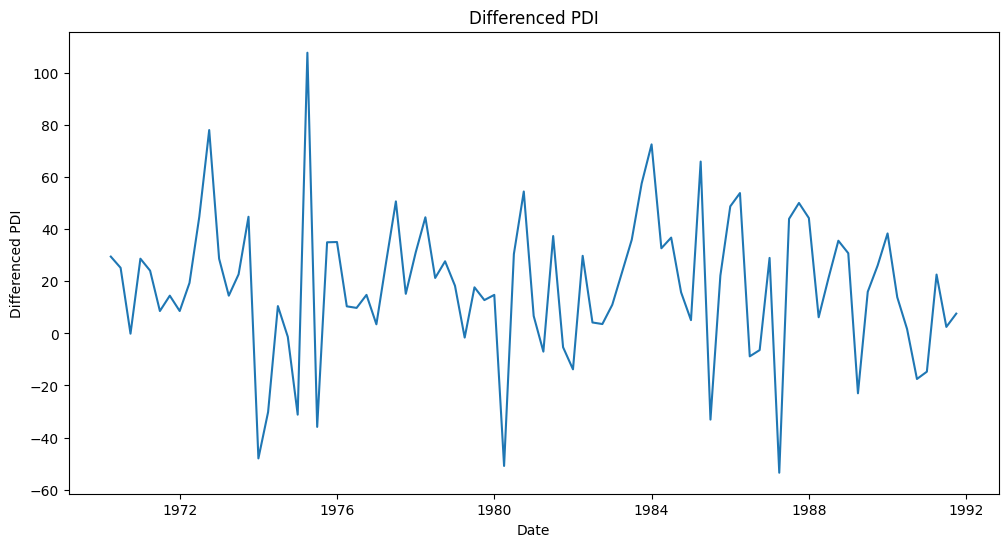

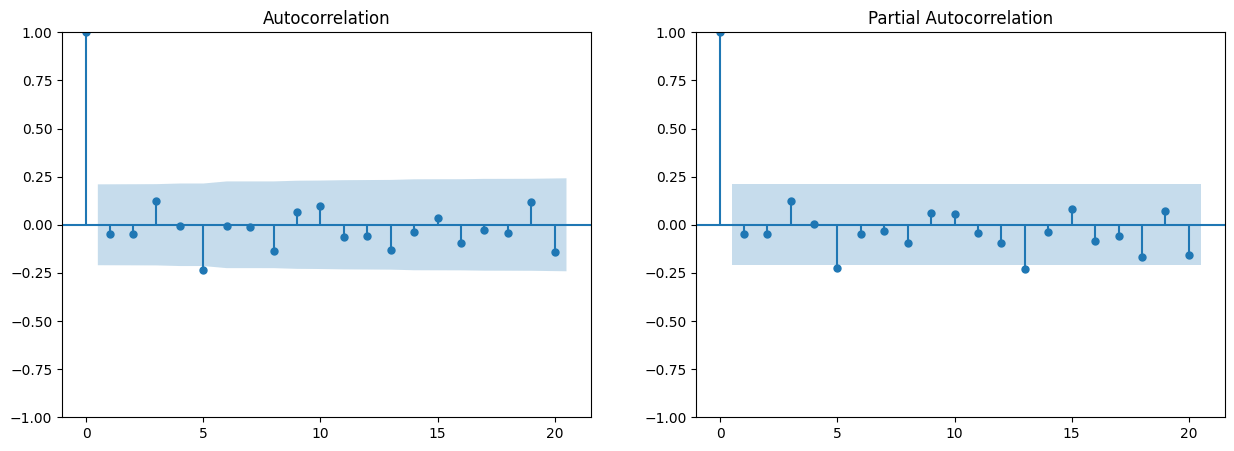

                               SARIMAX Results                                
Dep. Variable:                    PDI   No. Observations:                   88
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -414.881
Date:                Sun, 02 Nov 2025   AIC                            835.762
Time:                        23:31:25   BIC                            843.160
Sample:                    01-01-1970   HQIC                           838.741
                         - 10-01-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   2998.857      0.000       0.999       1.001
ma.L1         -0.9989      0.122     -8.213      0.000      -1.237      -0.761
sigma2       780.9138      0.000   5.04e+06      0.0

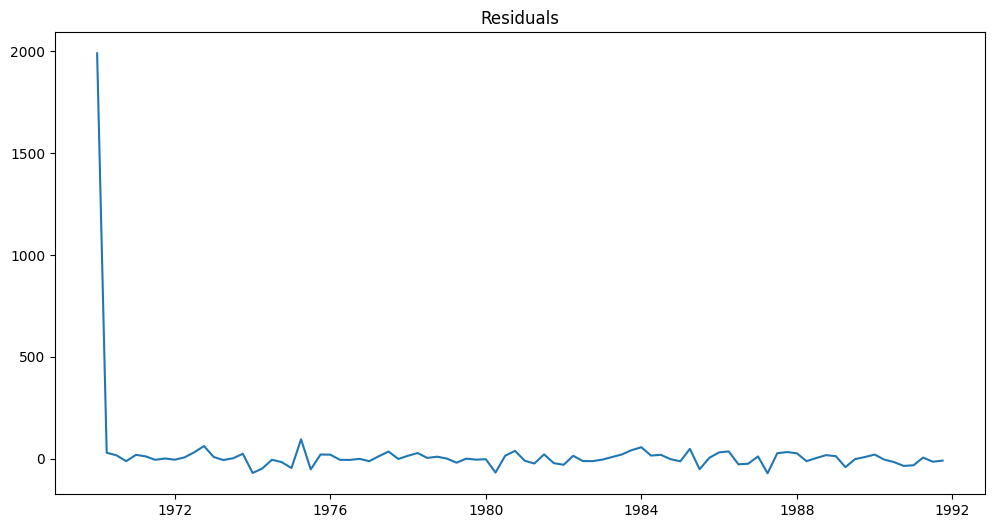

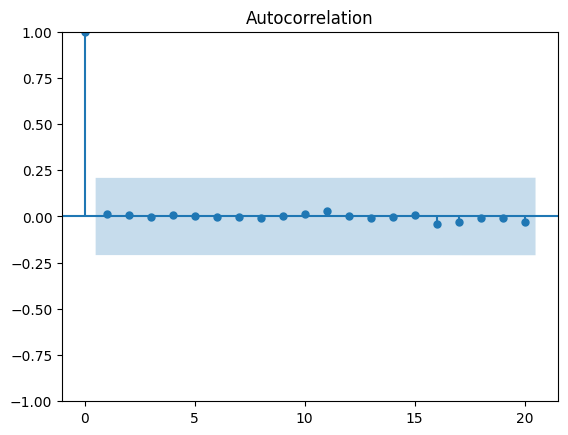


Forecast for next 4 quarters:
1992-01-01    3564.905110
1992-04-01    3582.310195
1992-07-01    3599.715253
1992-10-01    3617.120286
Freq: QS-OCT, Name: predicted_mean, dtype: float64


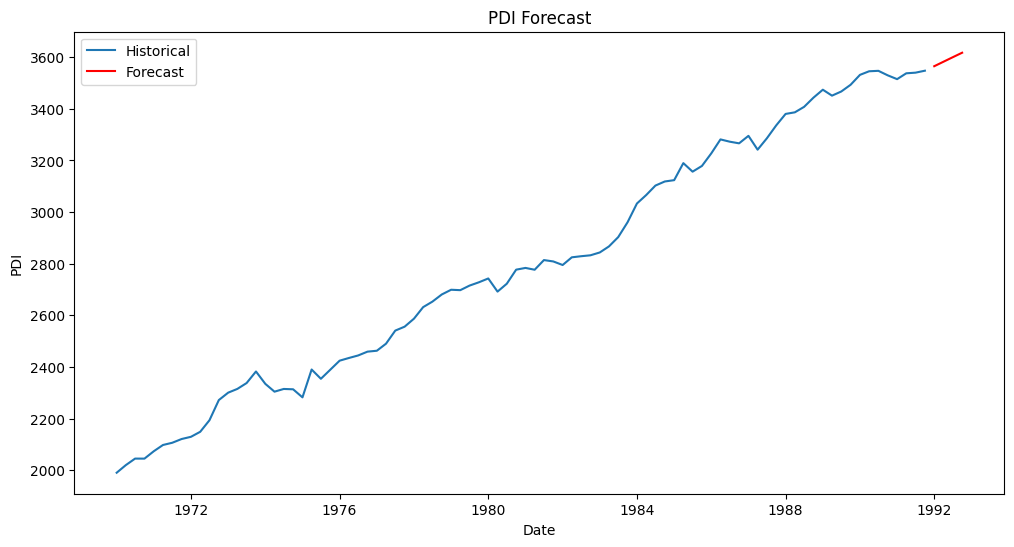

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# Step 1: Upload the Excel file
print("Please upload the Excel file 'Table 21.1 Gujarati.xlsx'")
uploaded = files.upload()

# Get the actual uploaded file name (handles duplicates like (1))
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

# Step 2: Prepare the data
# Rename columns if needed (assuming first column is 'YEAR', second is 'PDI')
df.columns = ['YEAR', 'PDI']

# Convert YEAR to quarterly period index
# YEAR is in format like 1970.1 for Q1 1970
def year_to_period(year):
    year_str = str(year)
    year_int, quarter_str = year_str.split('.')
    quarter = int(quarter_str)
    return pd.Period(f'{year_int}Q{quarter}')

df['Date'] = df['YEAR'].apply(year_to_period)
df.set_index('Date', inplace=True)
df = df['PDI']  # Keep only PDI series

# Convert PeriodIndex to DatetimeIndex for plotting
df.index = df.index.to_timestamp()

# Plot the original series
plt.figure(figsize=(12, 6))
plt.plot(df)
plt.title('Personal Disposable Income (PDI)')
plt.xlabel('Date')
plt.ylabel('PDI')
plt.show()

# Step 3: Check for stationarity
def check_stationarity(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] > 0.05:
        print('Series is not stationary')
    else:
        print('Series is stationary')

print('Stationarity test for original series:')
check_stationarity(df)

# Differencing to make it stationary (assuming first difference)
df_diff = df.diff().dropna()
print('\nStationarity test for differenced series:')
check_stationarity(df_diff)

# Plot differenced series
plt.figure(figsize=(12, 6))
plt.plot(df_diff)
plt.title('Differenced PDI')
plt.xlabel('Date')
plt.ylabel('Differenced PDI')
plt.show()

# Step 4: Determine ARIMA parameters using ACF and PACF
# Plot ACF and PACF for differenced series
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(df_diff, ax=axes[0])
plot_pacf(df_diff, ax=axes[1])
plt.show()

# Based on plots, suggest p and q (user may need to interpret)
# For example, assuming ARIMA(1,1,1) as a starting point
# You can adjust p, d, q based on ACF/PACF inspection

# Step 5: Fit ARIMA model
p = 1  # AR order (adjust based on PACF)
d = 1  # Differencing order
q = 1  # MA order (adjust based on ACF)

model = ARIMA(df, order=(p, d, q))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Step 6: Diagnostics
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# Plot ACF of residuals
plot_acf(residuals)
plt.show()

# Step 7: Forecasting (example: forecast next 4 quarters)
forecast_steps = 4
forecast = model_fit.forecast(steps=forecast_steps)

# Convert forecast index to timestamp if necessary
if isinstance(forecast.index, pd.PeriodIndex):
    forecast.index = forecast.index.to_timestamp()

print('\nForecast for next 4 quarters:')
print(forecast)

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(df, label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.title('PDI Forecast')
plt.xlabel('Date')
plt.ylabel('PDI')
plt.legend()
plt.show()

Liga Grok: https://grok.com/share/bGVnYWN5_efa9164a-38fd-4a67-b6e4-cdf1d75286f0

Los pasos que deben realizarse para ajustar un modelo ARIMA para los datos del problema serian los siguientes:

Graficar y visualizar la serie temporal para identificar patrones como tendencias, estacionalidad o irregularidades.

Realizar la prueba de estacionariedad como la prueba de Dickey-Fuller Aumentada (ADF) o KPSS para verificar si la serie es estacionaria en media y varianza. Si no lo es (p-valor > 0.05 en ADF), aplica transformaciones como diferenciación (para eliminar tendencias) o logaritmos (para estabilizar la varianza).

Realizar la prueba de autocorrelacion (ACF) y la de autocorrelacion parcial (PACF).

Probar combinaciones de ARIMA y verificar los residuos del modelo ajustado.

Interpretacion del Modelo:

Prueba de estacionariedad para la serie original:

La prueba de Dickey-Fuller Aumentada (ADF) evalúa si la serie tiene una raíz unitaria (indicando no estacionariedad). Aquí, el p-valor alto significa que no podemos rechazar la hipótesis de no estacionariedad.
Esto confirma lo que se ve en el gráfico: la tendencia ascendente hace que la media aumente con el tiempo, lo cual viola la suposición de estacionariedad requerida para modelos ARIMA.

Prueba de estacionariedad para la serie diferenciada:

Se aplicó una diferenciación de primer orden para eliminar la tendencia.
El p-valor muy bajo permite rechazar la hipótesis de no estacionariedad, confirmando que ahora la serie diferenciada tiene media constante (alrededor de cero) y varianza estable.
Esto implica que en el modelo ARIMA, el parámetro d = 1 (orden de diferenciación). No se necesita más diferenciaciones, ya que una sola basta para lograr estacionariedad.

Grafico de serie diferenciada:

Después de la diferenciación (d=1), la serie fluctúa alrededor de cero sin una tendencia clara, lo que confirma la estacionariedad. Se observan picos positivos (crecimientos rápidos, e.g., alrededor de 1975 y 1983) y caídas negativas (contracciones, e.g., 1974, 1980), posiblemente vinculados a eventos económicos como recesiones o recuperaciones en EE.UU. No hay patrones estacionales obvios (cada 4 trimestres), pero sí volatilidad variable (mayores fluctuaciones en los años 70-80).

Gráficos de Autocorrelación (ACF) y Autocorrelación Parcial (PACF) de la Serie Diferenciada:

ACF: Comienza en 1 (rezago 0, trivial), luego cae abruptamente a valores cercanos a cero para rezagos >0. La mayoría de los puntos están dentro de las bandas de confianza, indicando poca autocorrelación serial. Un corte rápido después del rezago 1 sugiere un componente MA(1) (q=1), ya que en un proceso MA(q), la ACF se corta después de q rezagos.

PACF: Similarmente, cae a cero después del rezago 1, con puntos dentro de las bandas. Esto indica un componente AR(1) (p=1), ya que en un proceso AR(p), la PACF se corta después de p rezagos.

Estos gráficos sugieren un modelo ARIMA(1,1,1) como candidato inicial, ya que combinan AR(1) y MA(1) sobre la serie diferenciada.

Tabla de Resultados del Modelo SARIMAX (ARIMA(1,1,1))

El coeficiente autorregresivo es estadísticamente significativo y cercano a 1, lo que implica persistencia fuerte en los cambios.
El coeficiente de media móvil es significativo y cercano a -1, indicando que los errores pasados corrigen negativamente los actuales.

Gráfico de Residuos (Residuals)

Los residuos comienzan altos (~2000 en 1970, lo que indica subestimación inicial del modelo) y caen rápidamente a valores cercanos a cero después de los primeros trimestres, con fluctuaciones menores (±50) en años posteriores. Esto sugiere que el modelo ajusta bien los datos recientes (1980-1990), pero lucha con los iniciales (1970s), posiblemente por cambios estructurales en la economía. La media de residuos es cerca de cero en general, pero la disminución inicial viola ligeramente la suposición de estacionariedad en residuos.

Gráfico de Autocorrelación de Residuos (Autocorrelation of Residuals)

La ACF comienza en 1 (rezago 0) y cae inmediatamente a valores cerca de cero para rezagos >0, con todos los puntos dentro de las bandas de confianza. No hay picos significativos, confirmando ausencia de autocorrelación serial en los residuos.

